In [18]:
# this has to be first to make sure that matplotlib runs in headless mode
import matplotlib
matplotlib.use("Agg")

import sys
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from fa2l import force_atlas2_layout
import networkx as nx
import matplotlib.pyplot as plt

from adjustText import adjust_text

from utils import set_node_size, set_node_color, set_node_label, edgecolor_by_source,filter_graph, get_subgraph_pos
from utils import draw_networkx_nodes_custom
#from scaling import extract_correct_scale
# Input Graph file 

infile = "climate2017.gexf"

G = nx.read_gexf(infile)
    
# extract the largest weakly connected component and convert to undirected for fa2l
    
G = max(nx.weakly_connected_component_subgraphs(G), key=len).to_undirected()
    
# set parameters
    
colormap = {"right":'#e62e00',
                'center':'#ace600', 
                'center_left':'#00bfff', 
                'center_right':'#ffebe6', 
                'left':'#5d5dd5', 
                'null':'darkgray'}
color_field = "partisan_retweet"
size_field = 'inlink_count'
filter_field = "inlink_count"
label_field = "label"
num_labels = 20 # number of labels to visualize
k = 150 # number of nodes to visualize

In [ ]:
# extract the positions
print("laying out with fa2l...")
    
    # calculate node sizes for whole graph to be used in layout
    #node_sizes = set_node_size(G,size_field= "inlink_count",min_size = 0.1, max_size=800)
    # setting up scale automatic. if search failed then the position is calculated with a default scale.
    # note : set up scale and positions should be calculated in the scale script instead of the visualization script. modify later.
    #result = extract_correct_scale(G,node_sizes,10,100)
    #if result[0] == False:
    #    pos = force_atlas2_layout(G,
    #                             iterations=50,
    #                             pos_list=None,
    #                             node_masses=None,
    #                             outbound_attraction_distribution=False,
    #                             lin_log_mode=False,
    #                             prevent_overlapping=False,
    #                             edge_weight_influence=1.0,
    #                             jitter_tolerance=1.0,
    #                             barnes_hut_optimize=True,
    #                             barnes_hut_theta=1.0,
    #                             scaling_ratio=38,
    #                            strong_gravity_mode=False,
    #                            multithread=False,
    #                            gravity=1.0)
    #else:
    #    pos = result[2]
    
    
fa2l_pos = force_atlas2_layout(G,
                              iterations=400,
                              pos_list=None,
                              node_masses=None,
                              outbound_attraction_distribution=False,
                              lin_log_mode=False,
                              prevent_overlapping=False,
                              edge_weight_influence=1.0,
                              jitter_tolerance=1.0,
                              barnes_hut_optimize=True,
                              barnes_hut_theta=1.0,
                              scaling_ratio=40,
                              strong_gravity_mode=False,
                              multithread=False,
                              gravity=1.0)
    
    
    
print("Extracted the positions")
#print(pos)

    

    


In [19]:
from fa2 import ForceAtlas2


forceatlas2 = ForceAtlas2(
                          # Behavior alternatives
    
                          outboundAttractionDistribution=False,  # Dissuade hubs
                          linLogMode=False,  # NOT IMPLEMENTED
                          adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                          edgeWeightInfluence=1.0,

                          # Performance
                          jitterTolerance=1.0,  # Tolerance
                          barnesHutOptimize=True,
                          barnesHutTheta=1.0,
                          multiThreaded=False,  # NOT IMPLEMENTED

                          # Tuning
                          scalingRatio=35.0,
                          strongGravityMode=False,
                          gravity=1.0,

                          # Log
                          verbose=True)

positions = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=200)

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:11<00:00, 18.15it/s]


BarnesHut Approximation  took  1.13  seconds
Repulsion forces  took  9.36  seconds
Gravitational forces  took  0.04  seconds
Attraction forces  took  0.12  seconds
AdjustSpeedAndApplyForces step  took  0.16  seconds


In [20]:
%matplotlib inline


In [21]:

def scale_layout(pos,scale):
    
    """ Scales layout """
    
    return { k:(v[0]*scale,v[1]*scale) for k,v in pos.items()}

In [22]:
original_node_sizes = set_node_size(G,size_field= "inlink_count",min_size = 10, max_size=400)

def direct_scale(pos,scale,node_sizes):
    pass
    # first I need to find out what the largest nodes are
    # then I need to find all the pairwise distances
    # then I have to get that minimum
    # then I set the ratio
    # scale it
    # return the newly scaled positions
    
    

In [23]:
pos = scale_layout(positions,1)

Drawing the visualization


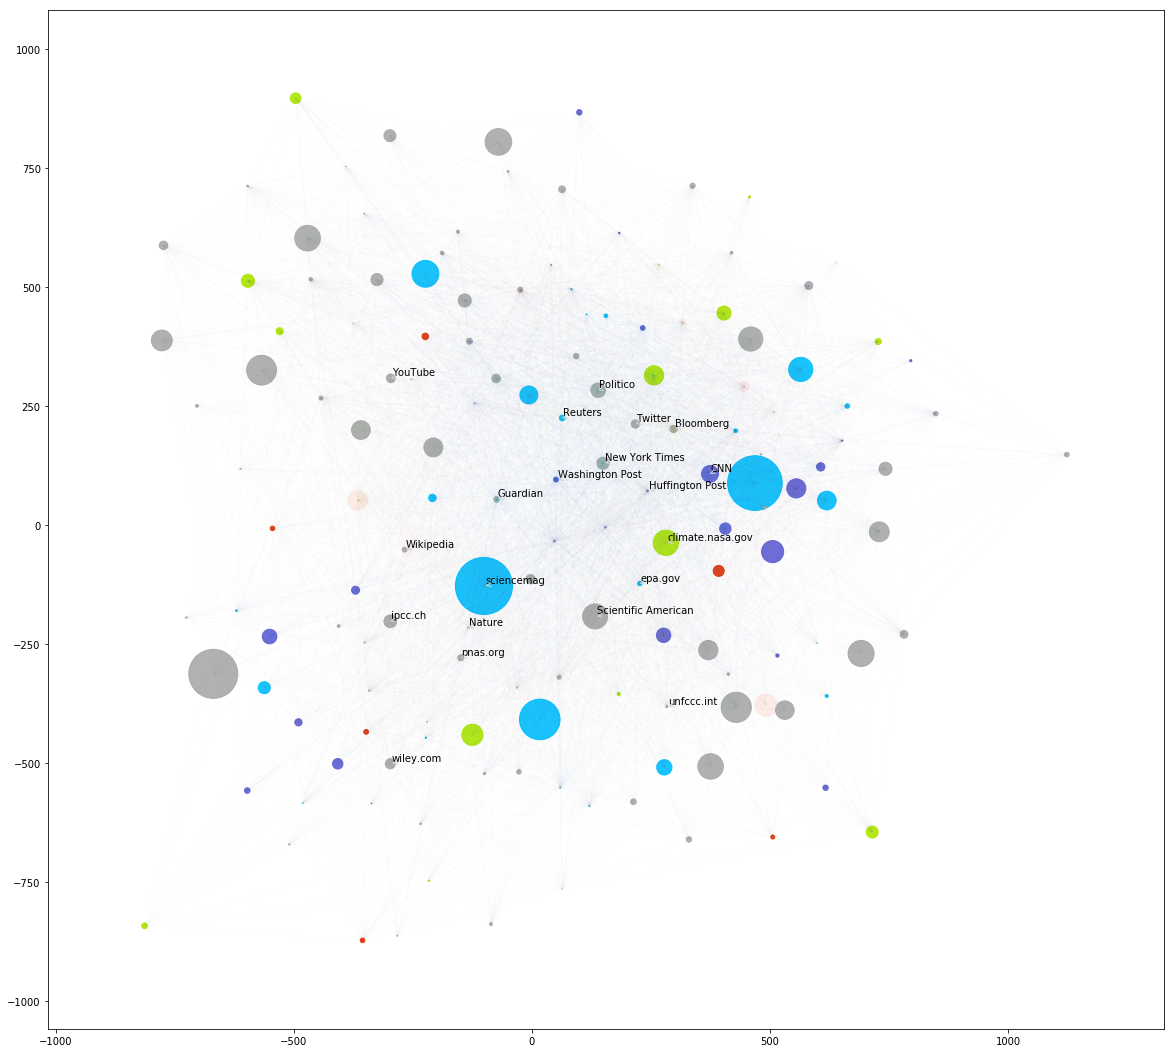

In [24]:
# Extract top k nodes for visualization
top_k_subgraph = filter_graph(G,filter_by=filter_field,top=k).to_undirected()

# Set visual attributes
node_sizes = set_node_size(top_k_subgraph,size_field= "inlink_count",min_size = 0.1, max_size=60) # max size 200 for script
node_colors = set_node_color(top_k_subgraph,color_by=color_field,colormap=colormap)
node_labels = set_node_label(top_k_subgraph,label_field = label_field)
subgraph_pos = get_subgraph_pos(top_k_subgraph,pos)
edge_colors = edgecolor_by_source(top_k_subgraph,node_colors)
    
print("Drawing the visualization")
    
# Get specific labels
    
subset_label_nodes = sorted(zip(top_k_subgraph.nodes(),node_sizes), key= lambda x:x[1], reverse = True)[0:num_labels]
subset_labels = {n[0]:node_labels[n[0]] for n in subset_label_nodes}
    
# plot the visualization
    
fig = plt.figure(figsize=(20,20)) # original (10,10) for script
ax = fig.add_subplot(111)
ax.set(xlim=[-10000, 10000], ylim=[-10000, 10000])


# Draw the nodes, edges, labels separately 
    
#nodes = nx.draw_networkx_nodes(top_k_subgraph,pos=subgraph_pos,node_size=node_sizes,node_color=node_colors, alpha=.7);
    
draw_networkx_nodes_custom(top_k_subgraph,pos=subgraph_pos,node_size=node_sizes,
                               node_color=node_colors,ax=ax,alpha=0.9)
#plt.axis("scaled")
#plt.axis('equal')

edges = nx.draw_networkx_edges(top_k_subgraph,pos=subgraph_pos,edge_color=edge_colors,alpha=0.01);
labels = nx.draw_networkx_labels(top_k_subgraph,pos=subgraph_pos,labels=subset_labels, font_size=10); #script size 6
plt.axis('scaled')


# Adjust label overlapping
    
    
x_pos = [v[0] for k,v in subgraph_pos.items()]
y_pos = [v[1] for k,v in subgraph_pos.items()]
adjust_text(texts = list(labels.values()),arrowprops=dict(arrowstyle='->', color='lightgray'))

# Declutter visualization
#ax.axis("off");
    
# save the plot
    
#plt.savefig("untitled.png")
    
# Show the plot
plt.show()